'''
v1: Scienceon, DBPIA, NTIS AuthorPapers 접근하여 Rawdata에서 필터링된 papers를 추가
v2: Answer 변경 및 f_id 수정 중
v3: time, tqdm 추가하여 속도 확인
v4: Scienceon, DBPIA에 mng로 검색 추가
v5: DBPIA 삭제하고 KCI 추가 & Rawdata 먼저 접급으로 변경, answer check 추가
'''

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import sklearn.preprocessing

In [2]:
xlsData = pd.read_excel("C:/workSpace(expert)/PM10.xlsx")

In [19]:
df = xlsData[['Temp', 'Wind Speed','Humidity']]

In [20]:
import sklearn

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [21]:
df_scaled = pd.DataFrame(df_scaled, columns=['Temp', 'Wind Speed','Humidity'])
df_scaled['target'] = xlsData['PM10_LEVEL']

In [22]:
df_scaled

,Temp,Wind Speed,Humidity,target
0,-1.282008,-0.915522,1.023210,2
1,-1.374098,-1.347032,1.366778,2
2,-1.392516,-1.562787,1.514021,2
3,-1.447770,-1.023400,1.612184,2
4,-1.484606,-1.347032,1.710346,2
...,...,...,...,...
16155,-1.116245,-0.591890,-0.890956,0
16156,-1.162290,-0.376136,-0.596469,1
16157,-1.199126,-1.131277,-0.301982,1
16158,-1.199126,-0.807645,-0.203820,1


In [23]:
pca = PCA(n_components=2)
pca.fit(df_scaled.iloc[:,:-1])

PCA(n_components=2)

In [24]:
df_pca = pca.transform(df_scaled.iloc[:,:-1])
df_pca = pd.DataFrame(df_pca, columns=['component 0', 'component 1'])

In [25]:
df_pca

,component 0,component 1
0,-1.737807,0.599033
1,-2.284208,0.499884
2,-2.532187,0.437956
3,-2.236631,0.456627
4,-2.536343,0.430963
...,...,...
16155,-0.271757,1.387488
16156,-0.319581,1.292852
16157,-1.041288,1.158418
16158,-0.876037,1.121663


In [26]:
print(pca.explained_variance_ratio_)

[0.47674339 0.3261024 ]


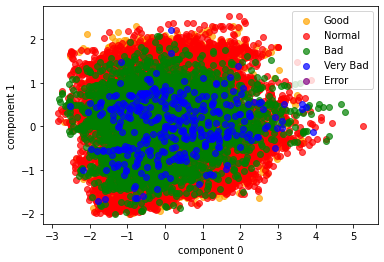

In [27]:
import matplotlib.pyplot as plt

# class target 정보 불러오기 
df_pca['target'] = df_scaled['target']

# target 별 분리
df_pca_0 = df_pca[df_pca['target'] == 0]
df_pca_1 = df_pca[df_pca['target'] == 1]
df_pca_2 = df_pca[df_pca['target'] == 2]
df_pca_3 = df_pca[df_pca['target'] == 3]
df_pca_4 = df_pca[df_pca['target'] == 4]

# target 별 시각화
plt.scatter(df_pca_0['component 0'], df_pca_0['component 1'], color = 'orange', alpha = 0.7, label = 'Good')
plt.scatter(df_pca_1['component 0'], df_pca_1['component 1'], color = 'red', alpha = 0.7, label = 'Normal')
plt.scatter(df_pca_2['component 0'], df_pca_2['component 1'], color = 'green', alpha = 0.7, label = 'Bad')
plt.scatter(df_pca_3['component 0'], df_pca_3['component 1'], color = 'blue', alpha = 0.7, label = 'Very Bad')
plt.scatter(df_pca_4['component 0'], df_pca_4['component 1'], color = 'purple', alpha = 0.7, label = 'Error')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()